In [1]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import spline
from scipy.interpolate import interp1d

In [2]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
        
    return TP, FP,TN, FN       

In [4]:
pro_x = []
pro_y = []
with open ('Data/CF_dann_trained_probabilities.txt') as f:
    lines = f.readlines()
    for x in lines:
        x = x[1:-2]
        x = x.lstrip()
        x = x.rstrip()
        y = x.strip().split("  ")
        pro_x.append(y[0].strip())
        pro_y.append(y[1].strip())

In [9]:
with open ('Data/CF_dann_trained_probabilities_x.txt','w') as f:
    f.write("\n".join(map(lambda x: x, pro_x)) + "\n")


In [10]:
with open ('Data/CF_dann_trained_probabilities_y.txt','w') as f:
    f.write("\n".join(map(lambda x: x, pro_y)) + "\n")

In [11]:
GT = pd.read_excel("Data/CF_dann_trained_test_set_vocab.xlsx")

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(GT.actual_label.values, GT.prediction.values, pos_label=1)

In [13]:
metrics.auc(fpr, tpr)

0.61635832521908462

In [14]:
metrics.accuracy_score(GT.actual_label.values, GT.prediction.values)

0.78260869565217395

In [15]:
TP, FP,TN, FN  = perf_measure(GT.actual_label.values, GT.prediction.values)

In [16]:
TP, FP,TN, FN

(5, 12, 67, 8)

In [17]:
actual_non_vio = GT[GT.actual_label==0]
actual_vio = GT[GT.actual_label==1]
print("len actual_non_vio",len(actual_non_vio))
print("len actual_vio",len(actual_vio))

('len actual_non_vio', 79)
('len actual_vio', 13)


In [19]:
prediction_non_vio = GT[GT.prediction==0]
prediction_vio = GT[GT.prediction==1]
print("len prediction_non_vio",len(prediction_non_vio))
print("len prediction_vio",len(prediction_vio))

('len prediction_non_vio', 75)
('len prediction_vio', 17)


In [20]:
non_vio_probab_x = GT.probabilities_non_violence.values
non_v_probab_y = np.zeros(92)

vio_probab_x = GT.probabilities_violence.values
v_probab_y = np.zeros(92)

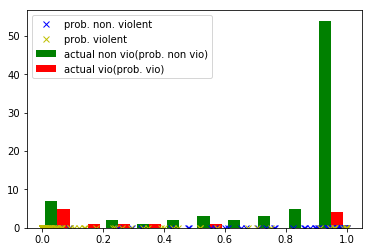

In [22]:
plt.hist([actual_non_vio.probabilities_non_violence,actual_vio.probabilities_violence],normed=0, histtype='bar', stacked=False, color = ['green','red'], label= ["actual non vio(prob. non vio)","actual vio(prob. vio)"])
plt.plot(non_vio_probab_x, non_v_probab_y, "bx",label='prob. non. violent' )
plt.plot(vio_probab_x, v_probab_y, "yx",label='prob. violent' )
plt.legend()
plt.savefig("Data/CF_dann_trained_actual_vio_actual_non_prob. dist.pdf")
plt.show()